In [6]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [7]:
%pip install nltk
import nltk
nltk.download('popular')

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/maya/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/maya/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/maya/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/maya/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/maya/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/maya/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk

True

In [106]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

class TextPreprocessor:
    def __init__(self, dictionary_path):
        self.stemmer = PorterStemmer()
        self.remove_punctuation_map = str.maketrans('', '', string.punctuation)
        self.dictionary = self.load_dictionary(dictionary_path)
        self.label_encoder = LabelEncoder()
        self.vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)

    def load_dictionary(self, dictionary_path):
        with open(dictionary_path) as f:
            return set(f.read().splitlines())

    def preprocess_text(self, text):
        text = text.lower().translate(self.remove_punctuation_map)
        tokens = nltk.word_tokenize(text)
        filtered_tokens = [w for w in tokens if w not in stopwords.words('english')]
        stemmed_tokens = [self.stemmer.stem(word) for word in filtered_tokens]
        return stemmed_tokens

    def preprocess_data(self, file_path):
        texts = pd.read_csv(file_path).dropna().reset_index(drop=True)
        unigrams = [self.preprocess_text(text) for text in texts['Text']]
        filtered_unigrams = [' '.join([word for word in unigram if word in self.dictionary]) for unigram in unigrams]
        
        labels = texts['Category'].tolist()
        y = self.label_encoder.fit_transform(labels)
        
        X = self.vectorizer.fit_transform(filtered_unigrams)
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
        
        return X_train, X_val, y_train, y_val,y

    def decode_labels(self, encoded_labels):
        return self.label_encoder.inverse_transform(encoded_labels)

# Example usage
dictionary_path = 'dictionary.txt'
file_path = '24_train_3.csv'
preprocessor = TextPreprocessor(dictionary_path)
X_train, X_val, y_train, y_val ,encoded_labels= preprocessor.preprocess_data(file_path)

In [107]:
encoded_labels

array([3, 0, 3, 3, 0, 4, 0, 1, 0, 3, 3, 2, 0, 0, 1, 1, 1, 2, 1, 1, 2, 3,
       4, 0, 0, 2, 2, 3, 3, 3, 4, 2, 1, 0, 1, 1, 2, 1, 2, 1, 3, 3, 4, 3,
       0, 0, 2, 0, 2, 2, 0, 3, 2, 1, 0, 4, 3, 2, 0, 2, 4, 1, 3, 1, 2, 4,
       3, 4, 2, 1, 3, 3, 3, 4, 3, 4, 4, 2, 4, 4, 2, 2, 0, 0, 0, 3, 4, 0,
       2, 1, 0, 1, 4, 3, 1, 2, 3, 4, 0, 0, 4, 4, 2, 0, 1, 4, 1, 4, 0, 4,
       1, 3, 0, 0, 4, 4, 3, 1, 3, 1, 3, 4, 0, 0, 2, 4, 1, 4, 4, 1, 0, 0,
       0, 4, 2, 3, 0, 4, 0, 2, 4, 3, 0, 0, 2, 4, 1, 3, 3, 3, 2, 0, 2, 1,
       2, 4, 4, 0, 3, 3, 1, 3, 3, 1, 4, 3, 1, 2, 0, 2, 4, 4, 0, 1, 2, 2,
       4, 4, 3, 0, 3, 0, 3, 2, 3, 2, 0, 4, 2, 4, 0, 1, 0, 0, 0, 4, 3, 4,
       3, 3, 1, 4, 4, 0, 0, 0, 1, 0, 4, 4, 4, 4, 0, 0, 2, 0, 3, 1, 3, 4,
       0, 0, 0, 3, 3, 0, 0, 0, 3, 4, 4, 3, 4, 0, 1, 1, 2, 2, 3, 3, 0, 1,
       4, 3, 2, 4, 0, 4, 1, 0, 2, 0, 3, 3, 3, 2, 0, 4, 3, 0, 0, 0, 3, 2,
       2, 4, 4, 4, 3, 0, 2, 0, 4, 2, 2, 0, 1, 4, 4, 4, 0, 3, 2, 3, 0, 1,
       3, 1, 4, 3, 1, 0, 4, 0, 2, 1, 2, 1, 3, 3, 1,

In [108]:
decoded_label= preprocessor.decode_labels(encoded_labels)

Note: you may need to restart the kernel to use updated packages.
Tarining Accuracies [1.0, 1.0]
Validation Accuracies [0.75, 0.8]


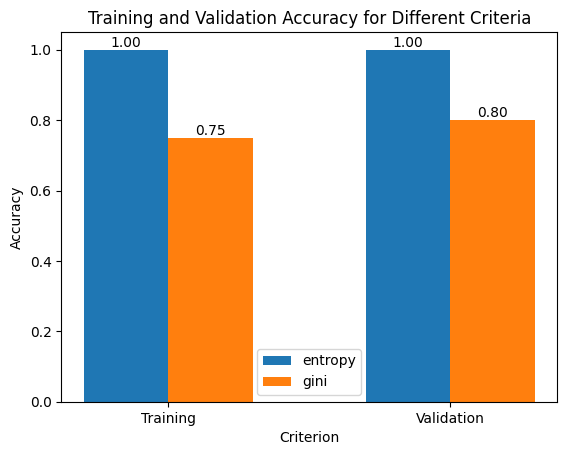

In [120]:
%pip install matplotlib
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

training_accuracies= []
validation_accuracies= []
criterion=['entropy','gini']
# decision_tree_training without tuning 
def DT_classifier(X_train, X_val, y_train, y_val):
    for crt in criterion:
        # Prepare the preprocessed X_train and y_train for training a decision tree
        decision_tree_classifier = DecisionTreeClassifier(criterion=crt)
        decision_tree_classifier.fit(X_train, y_train)

        # Calculate training accuracy
        y_train_pred = decision_tree_classifier.predict(X_train)
        training_accuracy = accuracy_score(y_train, y_train_pred)
        training_accuracies.append(training_accuracy)
        
        # Calculate validation accuracy
        y_test_pred = decision_tree_classifier.predict(X_val)
        validation_accuracy = accuracy_score(y_val, y_test_pred)
        validation_accuracies.append(validation_accuracy)

    print("Tarining Accuracies",training_accuracies)
    print("Validation Accuracies", validation_accuracies)

    # Plot the accuracies
    bar_width = 0.30
    index = range(2)

    fig,ax= plt.subplots()
    bars1 = ax.bar(index, training_accuracies, bar_width, label='entropy')
    bars2 = ax.bar([i + bar_width for i in index], validation_accuracies, bar_width, label='gini')

    # Add data labels on top of the bars
    for bar in bars1:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

    for bar in bars2:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

    plt.xlabel('Criterion')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy for Different Criteria')
    plt.xticks([i + bar_width / 2 for i in index], ["Training","Validation"])
    plt.legend()
    plt.savefig('plots/criterion.png')
    plt.show()
    
DT_classifier(X_train, X_val, y_train, y_val)    

========= min_samples_leaf: 1
min_samples_leaf: 1
Training accuracy: 100.00%
Validation accuracy: 74.63%
Standard deviation (Training): 0.0000
Standard deviation (Validation): 0.0493
========= min_samples_leaf: 2
min_samples_leaf: 2
Training accuracy: 96.50%
Validation accuracy: 76.13%
Standard deviation (Training): 0.0035
Standard deviation (Validation): 0.0451
========= min_samples_leaf: 3
min_samples_leaf: 3
Training accuracy: 94.47%
Validation accuracy: 75.75%
Standard deviation (Training): 0.0072
Standard deviation (Validation): 0.0525
========= min_samples_leaf: 5
min_samples_leaf: 5
Training accuracy: 91.06%
Validation accuracy: 74.88%
Standard deviation (Training): 0.0092
Standard deviation (Validation): 0.0434
========= min_samples_leaf: 7
min_samples_leaf: 7
Training accuracy: 88.31%
Validation accuracy: 75.50%
Standard deviation (Training): 0.0106
Standard deviation (Validation): 0.0370
========= min_samples_leaf: 9
min_samples_leaf: 9
Training accuracy: 86.12%
Validation ac

,min_samples_leaf,avg_train_accuracy,std_train_accuracy,avg_val_accuracy,std_val_accuracy
0,1,1.000000,0.000000,0.74625,0.049308
1,2,0.965000,0.003508,0.76125,0.045139
2,3,0.944688,0.007235,0.75750,0.052500
3,5,0.910625,0.009239,0.74875,0.043373
4,7,0.883125,0.010616,0.75500,0.036954
5,9,0.861250,0.009186,0.74000,0.037207
6,10,0.852812,0.014024,0.73500,0.051021


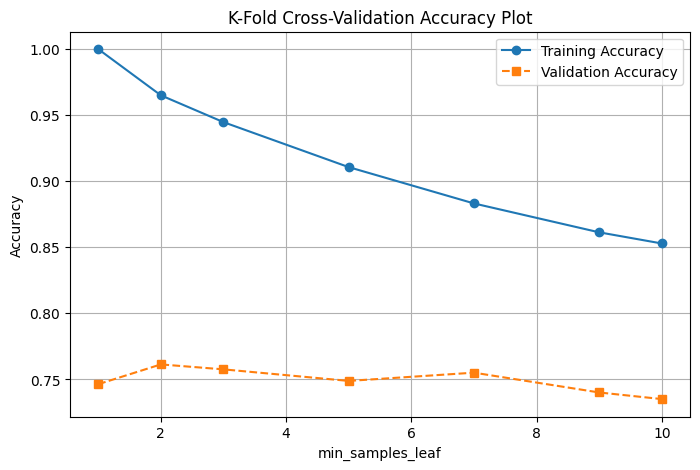

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def dtc_tuned(X, Y, min_samples_leaf_values):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Ensure reproducibility
    results = []

    for min_samples in min_samples_leaf_values:
        train_acc = []
        val_acc = []
        print("========= min_samples_leaf:", min_samples)

        for train_index, val_index in kf.split(X):
            train_X, val_X = X[train_index], X[val_index]
            train_y, val_y = Y[train_index], Y[val_index]
            
            dtc = DecisionTreeClassifier(min_samples_leaf=min_samples, random_state=42)
            dtc.fit(train_X, train_y)

            train_acc.append(dtc.score(train_X, train_y))
            val_acc.append(dtc.score(val_X, val_y))

        avg_train_acc = np.mean(train_acc)
        avg_val_acc = np.mean(val_acc)
        std_train_accuracy = np.std(train_acc)
        std_val_accuracy = np.std(val_acc)

        print(f"min_samples_leaf: {min_samples}")
        print(f"Training accuracy: {avg_train_acc * 100:.2f}%")
        print(f"Validation accuracy: {avg_val_acc * 100:.2f}%")
        print(f"Standard deviation (Training): {std_train_accuracy:.4f}")
        print(f"Standard deviation (Validation): {std_val_accuracy:.4f}")

        results.append({
            'min_samples_leaf': min_samples,
            'avg_train_accuracy': avg_train_acc,
            'std_train_accuracy': std_train_accuracy,
            'avg_val_accuracy': avg_val_acc,
            'std_val_accuracy': std_val_accuracy
        })

    # Convert results to a DataFrame and save
    results_df = pd.DataFrame(results)
    display(results_df)
    results_df.to_csv('DTC_CV_minSampleLeaf_results.csv', index=False)

    # Print the results table
    # print(results_df)

    # Plot the results
    plt.figure(figsize=(8, 5))
    plt.plot(min_samples_leaf_values, results_df['avg_train_accuracy'], marker='o', linestyle='-', label='Training Accuracy')
    plt.plot(min_samples_leaf_values, results_df['avg_val_accuracy'], marker='s', linestyle='--', label='Validation Accuracy')
    plt.xlabel('min_samples_leaf')
    plt.ylabel('Accuracy')
    plt.title("K-Fold Cross-Validation Accuracy Plot")
    plt.legend()
    plt.grid()
    plt.savefig('plots/DTC_CV_minSampleLeaf_results.png')
    plt.show()

# Example usage
min_samples_leaf_values = [1,2,3,5,7,9,10]
dtc_tuned(X_train, y_train, min_samples_leaf_values)


========= Depth: 10
max_depth: 10
Training accuracy: 88.94%
Validation accuracy: 71.38%
Standard deviation (Training): 0.0256
Standard deviation (Validation): 0.0591
========= Depth: 20
max_depth: 20
Training accuracy: 99.91%
Validation accuracy: 75.50%
Standard deviation (Training): 0.0008
Standard deviation (Validation): 0.0510
========= Depth: 30
max_depth: 30
Training accuracy: 100.00%
Validation accuracy: 74.63%
Standard deviation (Training): 0.0000
Standard deviation (Validation): 0.0493
========= Depth: 40
max_depth: 40
Training accuracy: 100.00%
Validation accuracy: 74.63%
Standard deviation (Training): 0.0000
Standard deviation (Validation): 0.0493
========= Depth: 50
max_depth: 50
Training accuracy: 100.00%
Validation accuracy: 74.63%
Standard deviation (Training): 0.0000
Standard deviation (Validation): 0.0493
========= Depth: 70
max_depth: 70
Training accuracy: 100.00%
Validation accuracy: 74.63%
Standard deviation (Training): 0.0000
Standard deviation (Validation): 0.0493


,depth,avg_train_accuracy,std_train_accuracy,avg_val_accuracy,std_val_accuracy
0,10.0,0.889375,0.025568,0.71375,0.059082
1,20.0,0.999062,0.000765,0.75500,0.050990
2,30.0,1.000000,0.000000,0.74625,0.049308
3,40.0,1.000000,0.000000,0.74625,0.049308
4,50.0,1.000000,0.000000,0.74625,0.049308
5,70.0,1.000000,0.000000,0.74625,0.049308
6,100.0,1.000000,0.000000,0.74625,0.049308
7,NaN,1.000000,0.000000,0.74625,0.049308


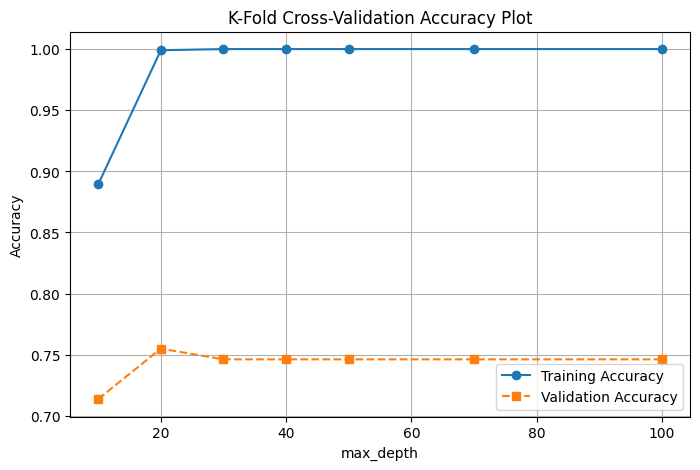

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def dtc_tuned(X, Y, max_depth_values):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Ensure reproducibility
    results = []

    for max_depth in max_depth_values:
        train_acc = []
        val_acc = []
        print("========= Depth:", max_depth)

        for train_index, val_index in kf.split(X):
            train_X, val_X = X[train_index], X[val_index]
            train_y, val_y = Y[train_index], Y[val_index]
            
            dtc = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
            dtc.fit(train_X, train_y)

            train_acc.append(dtc.score(train_X, train_y))
            val_acc.append(dtc.score(val_X, val_y))

        avg_train_acc = np.mean(train_acc)
        avg_val_acc = np.mean(val_acc)
        std_train_accuracy = np.std(train_acc)
        std_val_accuracy = np.std(val_acc)

        print(f"max_depth: {max_depth}")
        print(f"Training accuracy: {avg_train_acc * 100:.2f}%")
        print(f"Validation accuracy: {avg_val_acc * 100:.2f}%")
        print(f"Standard deviation (Training): {std_train_accuracy:.4f}")
        print(f"Standard deviation (Validation): {std_val_accuracy:.4f}")

        results.append({
            'depth': max_depth,
            'avg_train_accuracy': avg_train_acc,
            'std_train_accuracy': std_train_accuracy,
            'avg_val_accuracy': avg_val_acc,
            'std_val_accuracy': std_val_accuracy
        })

    # Convert results to a DataFrame and save
    results_df = pd.DataFrame(results)
    display(results_df)
    results_df.to_csv('DTC_CV_MaxDepth_results.csv', index=False)

    # Print the results table
    # print(results_df)

    # Plot the results
    plt.figure(figsize=(8, 5))
    plt.plot(max_depth_values, results_df['avg_train_accuracy'], marker='o', linestyle='-', label='Training Accuracy')
    plt.plot(max_depth_values, results_df['avg_val_accuracy'], marker='s', linestyle='--', label='Validation Accuracy')
    plt.xlabel('max_depth')
    plt.ylabel('Accuracy')
    plt.title("K-Fold Cross-Validation Accuracy Plot")
    plt.legend()
    plt.grid()
    plt.savefig('plots/DTC_CV_MaxDepth_results.png')
    plt.show()

# Example usage
max_depths = [10, 20,30,40,50,70,100,None]
dtc_tuned(X_train, y_train, max_depths)


========= max_features: 2
max_features: 2
Training accuracy: 100.00%
Validation accuracy: 52.12%
Standard deviation (Training): 0.0000
Standard deviation (Validation): 0.0289
========= max_features: 4
max_features: 4
Training accuracy: 100.00%
Validation accuracy: 55.25%
Standard deviation (Training): 0.0000
Standard deviation (Validation): 0.0320
========= max_features: 6
max_features: 6
Training accuracy: 100.00%
Validation accuracy: 53.00%
Standard deviation (Training): 0.0000
Standard deviation (Validation): 0.0398
========= max_features: 8
max_features: 8
Training accuracy: 100.00%
Validation accuracy: 53.88%
Standard deviation (Training): 0.0000
Standard deviation (Validation): 0.0406
========= max_features: 10
max_features: 10
Training accuracy: 100.00%
Validation accuracy: 51.88%
Standard deviation (Training): 0.0000
Standard deviation (Validation): 0.0271
========= max_features: None
max_features: None
Training accuracy: 100.00%
Validation accuracy: 74.63%
Standard deviation (

,max_features,avg_train_accuracy,std_train_accuracy,avg_val_accuracy,std_val_accuracy
0,2.0,1.0,0.0,0.52125,0.028940
1,4.0,1.0,0.0,0.55250,0.032016
2,6.0,1.0,0.0,0.53000,0.039804
3,8.0,1.0,0.0,0.53875,0.040582
4,10.0,1.0,0.0,0.51875,0.027099
5,NaN,1.0,0.0,0.74625,0.049308


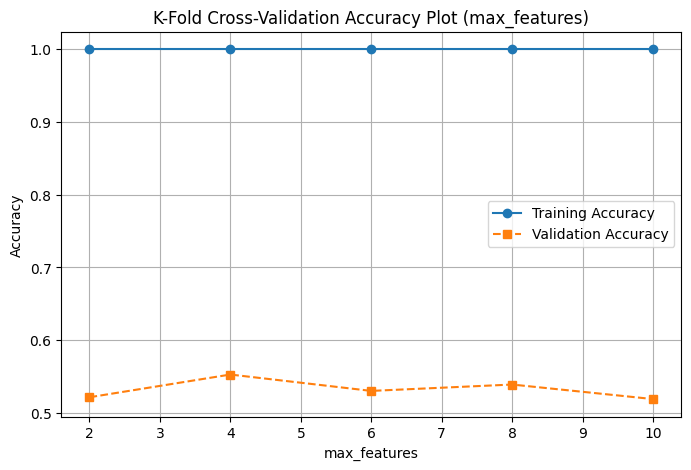

In [124]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def dtc_tuned_max_features(X, Y, max_features_values):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Ensure reproducibility
    results = []

    for max_features in max_features_values:
        train_acc = []
        val_acc = []
        print("========= max_features:", max_features)

        for train_index, val_index in kf.split(X):
            train_X, val_X = X[train_index], X[val_index]
            train_y, val_y = Y[train_index], Y[val_index]
            
            dtc = DecisionTreeClassifier(max_features=max_features, random_state=42)
            dtc.fit(train_X, train_y)

            train_acc.append(dtc.score(train_X, train_y))
            val_acc.append(dtc.score(val_X, val_y))

        avg_train_acc = np.mean(train_acc)
        avg_val_acc = np.mean(val_acc)
        std_train_accuracy = np.std(train_acc)
        std_val_accuracy = np.std(val_acc)

        print(f"max_features: {max_features}")
        print(f"Training accuracy: {avg_train_acc * 100:.2f}%")
        print(f"Validation accuracy: {avg_val_acc * 100:.2f}%")
        print(f"Standard deviation (Training): {std_train_accuracy:.4f}")
        print(f"Standard deviation (Validation): {std_val_accuracy:.4f}")

        results.append({
            'max_features': max_features,
            'avg_train_accuracy': avg_train_acc,
            'std_train_accuracy': std_train_accuracy,
            'avg_val_accuracy': avg_val_acc,
            'std_val_accuracy': std_val_accuracy
        })

    # Convert results to a DataFrame and save
    results_df = pd.DataFrame(results)
    display(results_df)
    results_df.to_csv('DTC_CV_results_max_features.csv', index=False)

    # Print the results table
    # print(results_df)

    # Plot the results
    plt.figure(figsize=(8, 5))
    plt.plot(max_features_values, results_df['avg_train_accuracy'], marker='o', linestyle='-', label='Training Accuracy')
    plt.plot(max_features_values, results_df['avg_val_accuracy'], marker='s', linestyle='--', label='Validation Accuracy')
    plt.xlabel('max_features')
    plt.ylabel('Accuracy')
    plt.title("K-Fold Cross-Validation Accuracy Plot (max_features)")
    plt.legend()
    plt.grid()
    plt.savefig('plots/DTC_CV_results_max_features.png')
    plt.show()

# Example usage
max_features_values = [2, 4, 6, 8, 10, None]  # None means all features are used
dtc_tuned_max_features(X_train, y_train, max_features_values)


# Random Forest Evaluation

* `n_estimators`: Used [10,20,50,75,100]  for stable predictions.
* `max_depth=20`: Since the validation for CV peaked at 20
* `min_samples_split=5`: A node must have at least 5 samples to split, reducing overly deep trees.
* `min_samples_leaf=10`: Ensures each leaf node has at least 10 samples, making trees more robust and Validation curve peaked at 10.
* `max_features=4`: Each tree randomly selects the square root of total features for splitting, improving diversity.Validation curve peaked at 4.
* `bootstrap=True`: Enables bootstrapping, ensuring model robustness by training on different subsets of data.

========= n_estimators: 10
n_estimators: 10
Training accuracy: 99.88%
Validation accuracy: 86.25%
Standard deviation (Training): 0.0012
Standard deviation (Validation): 0.0335
========= n_estimators: 20
n_estimators: 20
Training accuracy: 100.00%
Validation accuracy: 92.00%
Standard deviation (Training): 0.0000
Standard deviation (Validation): 0.0232
========= n_estimators: 50
n_estimators: 50
Training accuracy: 100.00%
Validation accuracy: 94.00%
Standard deviation (Training): 0.0000
Standard deviation (Validation): 0.0151
========= n_estimators: 75
n_estimators: 75
Training accuracy: 100.00%
Validation accuracy: 94.50%
Standard deviation (Training): 0.0000
Standard deviation (Validation): 0.0115
========= n_estimators: 100
n_estimators: 100
Training accuracy: 100.00%
Validation accuracy: 94.38%
Standard deviation (Training): 0.0000
Standard deviation (Validation): 0.0247


,n_estimators,avg_train_accuracy,std_train_accuracy,avg_val_accuracy,std_val_accuracy
0,10,0.99875,0.001169,0.86250,0.033541
1,20,1.00000,0.000000,0.92000,0.023184
2,50,1.00000,0.000000,0.94000,0.015104
3,75,1.00000,0.000000,0.94500,0.011456
4,100,1.00000,0.000000,0.94375,0.024686


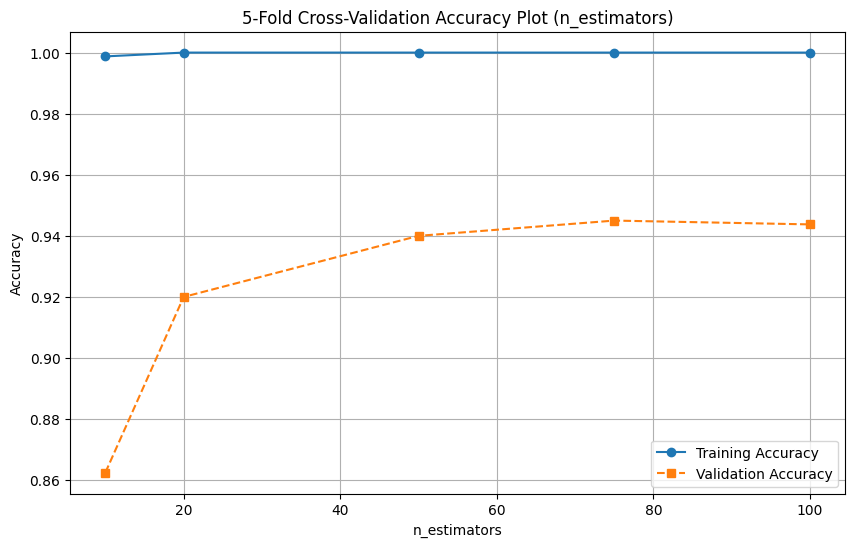

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

def evaluate_random_forest(X, y, n_estimators_values):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    results = []

    for n_estimators in n_estimators_values:
        train_acc = []
        val_acc = []
        print("========= n_estimators:", n_estimators)

        for train_index, val_index in kf.split(X):
            train_X, val_X = X[train_index], X[val_index]
            train_y, val_y = y[train_index], y[val_index]
            
            rf = RandomForestClassifier(n_estimators=n_estimators)
            rf.fit(train_X, train_y)

            train_acc.append(rf.score(train_X, train_y))
            val_acc.append(rf.score(val_X, val_y))

        avg_train_acc = np.mean(train_acc)
        avg_val_acc = np.mean(val_acc)
        std_train_accuracy = np.std(train_acc)
        std_val_accuracy = np.std(val_acc)

        print(f"n_estimators: {n_estimators}")
        print(f"Training accuracy: {avg_train_acc * 100:.2f}%")
        print(f"Validation accuracy: {avg_val_acc * 100:.2f}%")
        print(f"Standard deviation (Training): {std_train_accuracy:.4f}")
        print(f"Standard deviation (Validation): {std_val_accuracy:.4f}")

        results.append({
            'n_estimators': n_estimators,
            'avg_train_accuracy': avg_train_acc,
            'std_train_accuracy': std_train_accuracy,
            'avg_val_accuracy': avg_val_acc,
            'std_val_accuracy': std_val_accuracy
        })

    # Convert results to a DataFrame and display
    results_df = pd.DataFrame(results)
    display(results_df)
    # save the results in csv format 
    results_df.to_csv('Rf-CV_n_estimator.csv')

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(n_estimators_values, results_df['avg_train_accuracy'], marker='o', linestyle='-', label='Training Accuracy')
    plt.plot(n_estimators_values, results_df['avg_val_accuracy'], marker='s', linestyle='--', label='Validation Accuracy')
    plt.xlabel('n_estimators')
    plt.ylabel('Accuracy')
    plt.title("5-Fold Cross-Validation Accuracy Plot (n_estimators)")
    plt.legend()
    plt.grid()
    plt.savefig('plots/Rf-CV_n_estimator.png')
    plt.show()

# Example usage
n_estimators_values = [10, 20, 50, 75, 100]
evaluate_random_forest(X_train, y_train, n_estimators_values)

========= min_samples_leaf: 1
n_estimators: 1
Training accuracy: 100.00%
Validation accuracy: 95.00%
Standard deviation (Training): 0.0000
Standard deviation (Validation): 0.0119
========= min_samples_leaf: 2
n_estimators: 2
Training accuracy: 100.00%
Validation accuracy: 94.75%
Standard deviation (Training): 0.0000
Standard deviation (Validation): 0.0161
========= min_samples_leaf: 5
n_estimators: 5
Training accuracy: 98.94%
Validation accuracy: 94.12%
Standard deviation (Training): 0.0012
Standard deviation (Validation): 0.0188
========= min_samples_leaf: 7
n_estimators: 7
Training accuracy: 97.69%
Validation accuracy: 93.88%
Standard deviation (Training): 0.0027
Standard deviation (Validation): 0.0150
========= min_samples_leaf: 9
n_estimators: 9
Training accuracy: 96.84%
Validation accuracy: 93.37%
Standard deviation (Training): 0.0025
Standard deviation (Validation): 0.0215
========= min_samples_leaf: 10
n_estimators: 10
Training accuracy: 96.72%
Validation accuracy: 93.12%
Standa

,min_sample_leaf_value,avg_train_accuracy,std_train_accuracy,avg_val_accuracy,std_val_accuracy
0,1,1.000000,0.000000,0.95000,0.011859
1,2,1.000000,0.000000,0.94750,0.016105
2,5,0.989375,0.001169,0.94125,0.018792
3,7,0.976875,0.002688,0.93875,0.015000
4,9,0.968437,0.002500,0.93375,0.021506
5,10,0.967187,0.006011,0.93125,0.018540


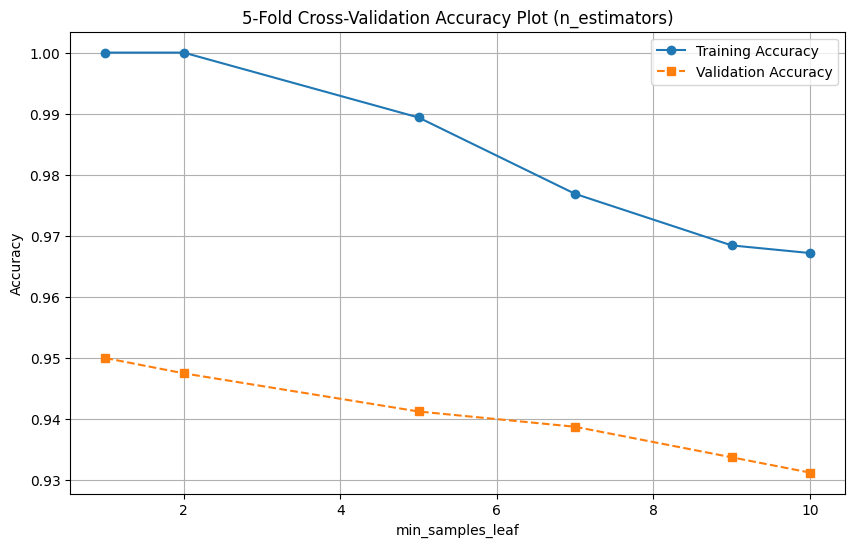

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

def evaluate_random_forest(X, y, min_samples_leaf_values):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    results = []

    for leaf_values in min_samples_leaf_values:
        train_acc = []
        val_acc = []
        print("========= min_samples_leaf:", leaf_values)

        for train_index, val_index in kf.split(X):
            train_X, val_X = X[train_index], X[val_index]
            train_y, val_y = y[train_index], y[val_index]
            
            rf = RandomForestClassifier(min_samples_leaf=leaf_values)
            rf.fit(train_X, train_y)

            train_acc.append(rf.score(train_X, train_y))
            val_acc.append(rf.score(val_X, val_y))

        avg_train_acc = np.mean(train_acc)
        avg_val_acc = np.mean(val_acc)
        std_train_accuracy = np.std(train_acc)
        std_val_accuracy = np.std(val_acc)

        print(f"n_estimators: {leaf_values}")
        print(f"Training accuracy: {avg_train_acc * 100:.2f}%")
        print(f"Validation accuracy: {avg_val_acc * 100:.2f}%")
        print(f"Standard deviation (Training): {std_train_accuracy:.4f}")
        print(f"Standard deviation (Validation): {std_val_accuracy:.4f}")

        results.append({
            'min_sample_leaf_value': leaf_values,
            'avg_train_accuracy': avg_train_acc,
            'std_train_accuracy': std_train_accuracy,
            'avg_val_accuracy': avg_val_acc,
            'std_val_accuracy': std_val_accuracy
        })

    # Convert results to a DataFrame and display
    results_df = pd.DataFrame(results)
    display(results_df)
    # save the results in csv format 
    results_df.to_csv('Rf-CV_min_sample_leaf_values.csv')

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(min_samples_leaf_values, results_df['avg_train_accuracy'], marker='o', linestyle='-', label='Training Accuracy')
    plt.plot(min_samples_leaf_values, results_df['avg_val_accuracy'], marker='s', linestyle='--', label='Validation Accuracy')
    plt.xlabel('min_samples_leaf')
    plt.ylabel('Accuracy')
    plt.title("5-Fold Cross-Validation Accuracy Plot (n_estimators)")
    plt.legend()
    plt.grid()
    plt.savefig('plots/Rf-CV_min_sample_leaf_values.png')
    plt.show()

# Example usage
min_samples_leaf_values = [1,2,5,7,9,10]
evaluate_random_forest(X_train, y_train, min_samples_leaf_values)

========= depth: 1
depths: 1
Training accuracy: 72.81%
Validation accuracy: 72.38%
Standard deviation (Training): 0.0462
Standard deviation (Validation): 0.0899
========= depth: 2
depths: 2
Training accuracy: 85.06%
Validation accuracy: 79.75%
Standard deviation (Training): 0.0291
Standard deviation (Validation): 0.0739
========= depth: 3
depths: 3
Training accuracy: 90.88%
Validation accuracy: 86.37%
Standard deviation (Training): 0.0177
Standard deviation (Validation): 0.0612
========= depth: 5
depths: 5
Training accuracy: 96.44%
Validation accuracy: 90.25%
Standard deviation (Training): 0.0076
Standard deviation (Validation): 0.0334
========= depth: 7
depths: 7
Training accuracy: 98.56%
Validation accuracy: 92.25%
Standard deviation (Training): 0.0041
Standard deviation (Validation): 0.0179
========= depth: 9
depths: 9
Training accuracy: 99.44%
Validation accuracy: 93.25%
Standard deviation (Training): 0.0039
Standard deviation (Validation): 0.0199
========= depth: 10
depths: 10
Tra

,depth,avg_train_accuracy,std_train_accuracy,avg_val_accuracy,std_val_accuracy
0,1.0,0.728125,0.046172,0.72375,0.089913
1,2.0,0.850625,0.029125,0.79750,0.073909
2,3.0,0.908750,0.017722,0.86375,0.061161
3,5.0,0.964375,0.007552,0.90250,0.033448
4,7.0,0.985625,0.004122,0.92250,0.017941
5,9.0,0.994375,0.003903,0.93250,0.019922
6,10.0,0.995625,0.002073,0.92500,0.026220
7,15.0,1.000000,0.000000,0.94875,0.013346
8,17.0,1.000000,0.000000,0.94625,0.012870
9,19.0,1.000000,0.000000,0.94625,0.020387


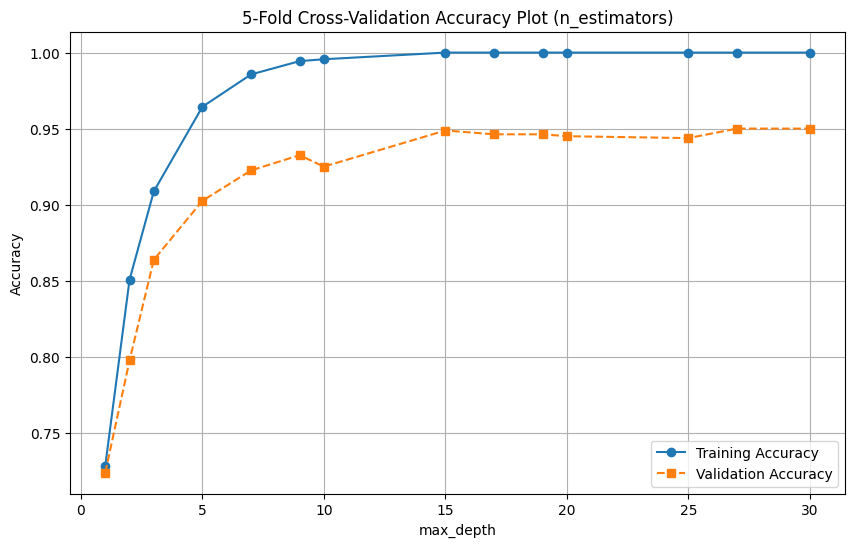

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

def evaluate_random_forest(X, y,max_depth):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    results = []

    for depths in max_depth:
        train_acc = []
        val_acc = []
        print("========= depth:", depths)

        for train_index, val_index in kf.split(X):
            train_X, val_X = X[train_index], X[val_index]
            train_y, val_y = y[train_index], y[val_index]
            
            rf = RandomForestClassifier(max_depth=depths)
            rf.fit(train_X, train_y)

            train_acc.append(rf.score(train_X, train_y))
            val_acc.append(rf.score(val_X, val_y))

        avg_train_acc = np.mean(train_acc)
        avg_val_acc = np.mean(val_acc)
        std_train_accuracy = np.std(train_acc)
        std_val_accuracy = np.std(val_acc)

        print(f"depths: {depths}")
        print(f"Training accuracy: {avg_train_acc * 100:.2f}%")
        print(f"Validation accuracy: {avg_val_acc * 100:.2f}%")
        print(f"Standard deviation (Training): {std_train_accuracy:.4f}")
        print(f"Standard deviation (Validation): {std_val_accuracy:.4f}")

        results.append({
            'depth': depths,
            'avg_train_accuracy': avg_train_acc,
            'std_train_accuracy': std_train_accuracy,
            'avg_val_accuracy': avg_val_acc,
            'std_val_accuracy': std_val_accuracy
        })

    # Convert results to a DataFrame and display
    results_df = pd.DataFrame(results)
    display(results_df)
    # save the results in csv format 
    results_df.to_csv('Rf-CV_Depths.csv')

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(max_depth, results_df['avg_train_accuracy'], marker='o', linestyle='-', label='Training Accuracy')
    plt.plot(max_depth, results_df['avg_val_accuracy'], marker='s', linestyle='--', label='Validation Accuracy')
    plt.xlabel('max_depth')
    plt.ylabel('Accuracy')
    plt.title("5-Fold Cross-Validation Accuracy Plot (n_estimators)")
    plt.legend()
    plt.grid()
    plt.savefig('plots/Rf-CV_Depths.png')
    plt.show()

# Example usage
max_depth=[1,2,3,5,7,9,10,15,17,19,20,25,27,30,None]

evaluate_random_forest(X_train, y_train, max_depth)

In [75]:
# Preprocess the data 

def preprocess_text(text):
    # Turn document into lowercase
    lowers = text.lower()
    # Remove punctuations
    no_punctuation = lowers.translate(remove_punctuation_map)
    # Tokenize document
    tokens = nltk.word_tokenize(no_punctuation)
    # Remove stop words
    filtered = [w for w in tokens if not w in stopwords.words('english')]
    # Stemming process
    stemmed = [stemmer.stem(item) for item in filtered]
    return stemmed

# Function to preprocess the entire dataset
def preprocess__test_data(file_path, dictionary_path):
    # Load the dataset
    texts = pd.read_csv(file_path)
    texts = texts.dropna().reset_index(drop=True)
    
    # Load the dictionary
    with open(dictionary_path) as f:
        dictionary = f.read().splitlines()
    
    # Create unigrams
    unigrams = [preprocess_text(text) for text in texts['Text']]
    
    # Filter unigrams using the dictionary
    filtered_unigrams = [[word for word in unigram if word in dictionary] for unigram in unigrams]
    
    # Join tokens back into a single string for each document
    filtered_unigrams = [' '.join(unigram) for unigram in filtered_unigrams]
    
    # Check if 'Category' column exists
    if 'Category' in texts.columns:
        # Encode labels
        labels = texts['Category'].tolist()
        label_encoder = LabelEncoder()
        y = label_encoder.fit_transform(labels)
    else:
        y = None
    
    # Vectorize the processed documents
    tfidf_vectoriser = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
    X = tfidf_vectoriser.fit_transform(filtered_unigrams)
    
    return X, y

x_test, y_test = preprocess__test_data('news-test-1 - news-test.csv', 'dictionary.txt')

## Choosing the best params for Decision tree , Random forest , Ada Boost , and Gradient Boost on the basis of Val Accuracy

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': criterion,
    'max_depth': max_depths,
    'min_samples_split':[2,5],
    'min_samples_leaf': min_samples_leaf_values,
    'max_features': max_features_values
}

# Initialize the Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

# Train the model with the best parameters on the full training set
best_dtc = DecisionTreeClassifier(**best_params, random_state=42)
best_dtc.fit(X_train, y_train)

# Evaluate on the validation set
val_accuracy = best_dtc.score(X_val, y_val)
print("Validation Accuracy with Best Parameters:", val_accuracy)

Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Cross-Validation Accuracy: 0.7525000000000001
Validation Accuracy with Best Parameters: 0.75


In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [1,2,3,5,7,9,10,15,17,19,20,25,27,29,30,None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt','log2']  # Try 'sqrt' or 'log2' 
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best Parameters for RandomForest:", best_params_rf)
print("Best Cross-Validation Accuracy for RandomForest on training set:", best_score_rf)

# Train the model with the best parameters on the full training set
best_rf = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf.fit(X_train, y_train)

# Evaluate on the validation set
val_accuracy_rf = best_rf.score(X_val, y_val)
print("Validation Accuracy with Best Parameters for RandomForest:", val_accuracy_rf)

Best Parameters for RandomForest: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy for RandomForest on training set: 0.9550000000000001
Validation Accuracy with Best Parameters for RandomForest: 0.925


In [70]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

param_grid_ada = {
    'n_estimators': [50, 100, 150, 200],  # Number of weak learners
    'learning_rate': [0.1, 0.5, 1.0, 1.5, 2.0],  # Controls the contribution of each weak learner
    'algorithm': ['SAMME', 'SAMME.R']  # Algorithm used for weight updates
}

ada = AdaBoostClassifier(random_state=42)
best_ada = GridSearchCV(estimator=ada, param_grid=param_grid_ada, cv=5, scoring='accuracy', n_jobs=-1)
best_ada.fit(X_train, y_train) 

# Get the best parameters and score
print("Best Parameters for AdaBoost:", best_ada.best_params_)
print("Best Cross-Validation Accuracy for AdaBoost:", best_ada.best_score_)

/home/maya/Documents/Data_mining_Hw1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/home/maya/Documents/Data_mining_Hw1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/home/maya/Documents/Data_mining_Hw1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/home/maya/Documents/Data_mining_Hw1/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/home/maya/D

Best Parameters for AdaBoost: {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 200}
Best Cross-Validation Accuracy for AdaBoost: 0.8975


* Out of Decision Trees, Random forest and Ada boost got the max validation accuracy in case of Random Forest with these Parameters 
* {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}



In [96]:
test_data= pd.read_csv('news-test-1 - news-test.csv')

In [ ]:
# Predict the labels for the testing data using the best model
y_test_pred = best_rf.predict(x_test)
decoded_labels= preprocessor.decode_labels(y_test_pred)
# print(decoded_labels)
# Print the predicted labels
# print("Predicted Labels for Testing Data:", y_test_pred)
results=[]
results.append((test_data['ArticleId'], decoded_labels))
result_df = pd.DataFrame(list(zip(test_data['ArticleId'], decoded_labels)), columns=['ArticleId', 'PredictedLabel'])

result_df.to_csv('Predictions.csv',header=None)
print("Predictions Done ")

In [2]:
import csv

with open("Predictions.csv", "r") as infile, open("labels.csv", "w", newline="") as outfile:
    reader = csv.reader(infile)
    next(reader, None)  # Skip the header row
    writer = csv.writer(outfile)
    writer.writerows(reader)
